In [1]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import OPTAMI as opt
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
x = torch.tensor([1.,2.])#.to(torch.double)

x.requires_grad_()
#y = torch.tensor([2.])#.to(torch.double)
#y.requires_grad_()
def f(x):
    return x.square().square().sum()
    
L1 = 24
def g(x):
    return x.square().mul(x).mul(4.)

In [3]:
optimizer = opt.Hyperfast([x], L = L1)
losses = []
def closure():
    optimizer.zero_grad()
    loss = f(x) #+ f(y)
    
    return loss
for i in range(30):
    loss = closure()
    losses.append(loss.clone().detach().item())
    
    optimizer.step(closure)


End of line search. Total line_search calc: 1
theta after ls 0.25
End of line search. Total line_search calc: 3
theta after ls 0.34375
End of line search. Total line_search calc: 4
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search calc: 1
theta after ls 0.34375
End of line search. Total line_search

In [4]:
loss = closure()
print(loss, x)

tensor(3.0912e-19, grad_fn=<SumBackward0>) tensor([8.5706e-06, 2.3476e-05], requires_grad=True)


In [5]:
print(losses)

[17.0, 3.263576030731201, 1.103547215461731, 0.2410891354084015, 0.03830212727189064, 0.00394891994073987, 0.00034023879561573267, 3.373882645973936e-05, 4.239818281348562e-06, 5.997312086947204e-07, 7.997839190920786e-08, 9.26828036540428e-09, 9.90675985690359e-10, 1.0897535651643864e-10, 1.2979778710175971e-11, 1.6241099177333185e-12, 2.0056604489206153e-13, 2.3697911715652234e-14, 2.7048082876105287e-15, 3.085565267510861e-16, 3.7251499859896814e-17, 4.922661840324537e-18, 4.2658950130157295e-19, 1.413479380641166e-19, 3.135838600261231e-19, 1.3351077657639172e-19, 3.343935528888493e-19, 9.278958621154969e-20, 3.4826020188253513e-19, 1.987433124321804e-19]


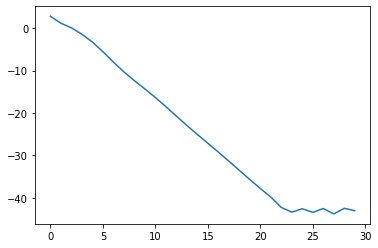

In [6]:
plt.plot(np.log(losses))

In [7]:
x = torch.tensor([1.,2.])#.to(torch.double)

x.requires_grad_()

optimizer = opt.BDGM([x], L = L1)
losses_bdgm = []
def closure():
    optimizer.zero_grad()
    loss = f(x) #+ f(y)
    
    return loss
for i in range(30):
    loss_bdgm = closure()
    losses_bdgm.append(loss_bdgm.clone().detach().item())
    
    optimizer.step(closure)



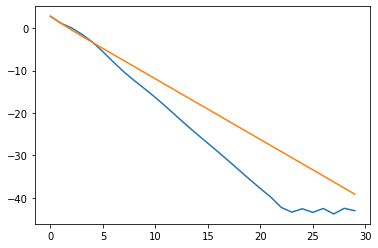

In [8]:
plt.plot(np.log(losses))
plt.plot(np.log(losses_bdgm))